# Sentiment Analysis in NLP

## Introduction
Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine the sentiment or emotion behind a piece of text. It classifies text as **positive, negative, or neutral** based on its content.

Common applications of sentiment analysis include:
- **Social Media Monitoring** (e.g., analyzing Twitter sentiment)
- **Customer Feedback Analysis** (e.g., reviews on Amazon, Yelp)
- **Market Research** (e.g., understanding public opinion on products or services)

## Example: Sentiment Analysis using `VADER`
We will use **VADER (Valence Aware Dictionary and sEntiment Reasoner)**, a popular lexicon-based sentiment analysis tool for short texts.

### Import the Required Libraries

# How NLTK and WordCloud Help in Sentiment Analysis  

## NLTK (Natural Language Toolkit)  
NLTK is a powerful library for **text processing and sentiment analysis**. It provides:  
- **VADER (Valence Aware Dictionary and sEntiment Reasoner)** for sentiment scoring.  
- **Tokenization, stopword removal, and stemming** for preprocessing text.  
- **Classification models** to improve sentiment prediction.  

**Example Usage:**  
- Analyzing **social media posts, reviews, and feedback**.  
- Categorizing text into **positive, negative, or neutral** sentiments.  

## WordCloud  
WordCloud is a visualization tool that helps in **identifying important words** in sentiment analysis. It:  
- Highlights **frequent words** influencing sentiment.  
- Helps understand **key emotions** in text data.  
- Provides a **quick summary** of large text datasets.  

**Example Usage:**  
- Visualizing **positive vs. negative word distributions** in reviews.  
- Finding **commonly used words in negative feedback**.  

## Conclusion  
- **NLTK** is used for **sentiment scoring and text analysis**.  
- **WordCloud** helps **visualize key words influencing sentiment**.  
- Together, they enhance **understanding and interpretation** of text data in sentiment analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# Word cloud
from wordcloud import WordCloud

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Sklearn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

### If you are getting an error, follow the given steps
**🔹 Steps to Fix It:**

- Open the file mentioned in your error:  
  `C:\Python312\Lib\site-packages\scikitplot\metrics.py`

- Find this line (around line 27):  
  `from scipy import interp`

- Replace it with:  
  `from numpy import interp`

- Save the file and restart your Python kernel.

This change tells scikit-plot to use `numpy.interp` instead, which is still available.

## Import Dataset
- https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [ ]:
df_train = pd.read_csv("C:/Users/LOHITHA/Desktop/DSP/Datasets/emotions/train.txt")
df_val = pd.read_csv("C:/Users/LOHITHA/Desktop/DSP/Datasets/emotions/val.txt")

In [ ]:
df_train

- Here, the data is also considered as a header. So, correct it
- Here, we are getting each value as a single element.
- So we should split it now

In [8]:
df_train = pd.read_csv("C:/Users/LOHITHA/Desktop/DSP/Datasets/emotions/train.txt", delimiter=';', names=['Text', 'Label'], header=None)
df_val = pd.read_csv("C:/Users/LOHITHA/Desktop/DSP/Datasets/emotions/val.txt", delimiter=';', names=['Text', 'Label'], header=None)

In [ ]:
df_train

In [ ]:
df_val

In [9]:
# Let's combine both the dataframes

df = pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop = True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.sample(5)

In [ ]:
df.head(2)

In [ ]:
# Total number of categories
df.Label.unique()

In [ ]:
# Total number of records in each category
df.Label.value_counts()

In [ ]:
# Represent the total number of records in each category in a bar plot
df.Label.value_counts().plot.bar()

# 📌 Sentiment Classification: Binary Categorization

This dataset is a **multiclass classifier**, meaning it has more than two unique labels. However, for simplicity, we can classify the emotions into **positive** and **negative** sentiments.

## 🟢 Positive Sentiments (`1`)
- **Joy**
- **Love**
- **Surprise**

## 🔴 Negative Sentiments (`0`)
- **Anger**
- **Sadness**
- **Fear**

We will now map these categories into binary values (1 for positive, 0 for negative) to perform sentiment classification. 🚀


In [ ]:
# Now, let's replace all the positive statements with 1 and all the negative statements with 0

In [10]:
df['Label'] = df['Label'].replace(to_replace = ['joy', 'love', 'surprise'], value=1)
df['Label'] = df['Label'].replace(to_replace = ['anger', 'sadness', 'fear'], value=0)

C:\Users\LOHITHA\AppData\Local\Temp\ipykernel_12184\2345949321.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(to_replace = ['anger', 'sadness', 'fear'], value=0)


In [ ]:
df.head()

In [ ]:
# Now, we have worked with the Label column.
# Now, let's work on the Text column.

# Let's use re module to get rid of all the characters apart from alphabets

In [11]:
lm = WordNetLemmatizer()

In [12]:
def transformation(df_column):
    output = []
    for i in df_column:
        new_text = re.sub('[^a-zA-Z]', ' ', str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
        output.append(' '.join (str(k) for k in new_text))
    return output

# 🔍 Understanding the `transformation` Function

This function **cleans and processes text data** by:
1. Removing non-alphabetical characters.
2. Converting text to lowercase.
3. Tokenizing (splitting) the text into words.
4. Removing stopwords (common words like "the", "is", "and").
5. Lemmatizing (reducing words to their base form).

---

## 📌 **Function Breakdown with Example**  
Let's apply the function to the following text:  

**Original Text:**  
"I can go from feeling so hopeless to so damned..."

---

### **Step-by-Step Execution**

1. **Removing non-alphabetical characters**  
   The first step in the function is to remove any characters that are not letters (i.e., punctuation, numbers, etc.). We use the `re.sub()` function for this.

   - **Before:**  
   "I can go from feeling so hopeless to so damned..."
   
   - **After:**  
   "I can go from feeling so hopeless to so damned "  
   (Note that the period is removed).

---

2. **Converting text to lowercase**  
   The next step is to convert all letters to lowercase to ensure consistency in the data.

   - **Before:**  
   "I can go from feeling so hopeless to so damned "
   
   - **After:**  
   "i can go from feeling so hopeless to so damned "  
   (All letters are now lowercase).

---

3. **Tokenizing the text**  
   Tokenization splits the text into individual words. This is done using the `split()` function.

   - **Before:**  
   "i can go from feeling so hopeless to so damned "
   
   - **After:**  
   ['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned']  
   (The text is now a list of words).

---

4. **Removing stopwords and lemmatizing**  
   At this point, we remove common **stopwords** (e.g., "i", "can", "from", "so", "to") and then apply **lemmatization** (which reduces words to their base form). For example, "feeling" becomes "feel".

   - **Stopwords Removed:**  
   'i', 'can', 'from', 'so', 'to' are discarded.
   
   - **Lemmatization:**  
   "feeling" becomes "feel", leaving us with the base forms of the remaining words.

   - **Before:**  
   ['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned']
   
   - **After:**  
   ['go', 'feel', 'hopeless', 'damned']  
   (Only meaningful words are kept).

---

5. **Joining the processed words back into a sentence**  
   Finally, the processed words are joined back into a single string.

   - **Before:**  
   ['go', 'feel', 'hopeless', 'damned']  
   
   - **After:**  
   "go feel hopeless damned"  
   (The words are now joined into a cleaned sentence).

---

## 🎯 **Final Output**
After applying the function, the text:  
"I can go from feeling so hopeless to so damned..."  
**Transforms into:**  
"go feel hopeless damned"

This cleaned text is now **better suited for machine learning models and NLP tasks**! 🚀


In [13]:
var = transformation(df.Text)

In [14]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

### Why Some Words Didn't Get Lemmatized:

The **WordNetLemmatizer** is not a basic lemmatizer. It is more advanced because it uses **WordNet**, a lexical database, to look up words and determine their base form (lemma). However, it requires the **part of speech (POS)** of the word to work correctly.

- **POS (Part of Speech)** is important because the WordNetLemmatizer uses it to understand how a word should be lemmatized. 
- By default, it assumes a word is a **noun** unless explicitly told otherwise.
  
For example:
- The word **"feeling"** might not be reduced to **"feel"** because WordNetLemmatizer assumes it’s a noun (e.g., "a feeling").
- If the word is a **verb** (e.g., "I am feeling happy"), the lemmatizer needs to be told it’s a verb in order to reduce it to its base form **"feel"**.

Thus, some words may not get converted correctly if their part of speech isn't specified.

# 🌥️ Word Cloud

A **Word Cloud** is a **visual representation of text** where words that appear more frequently are displayed **larger**. It helps to quickly identify key terms or themes in a dataset.

### How It Works:
- **Frequent Words**: Words that appear often in the text are shown in **larger fonts**.
- **Less Frequent Words**: Words that appear less often are shown in **smaller fonts**.

### Uses:
- **Text Analysis**: Identify the most common words in a dataset (e.g., customer reviews, articles).
- **Quick Insights**: Gives a snapshot of the key topics or themes.

### Benefits:
- **Easy to Understand**: Simple way to visualize the most common words.
- **Interactive**: Can be customized with colors and shapes for better engagement.

### Limitations:
- **Context**: Loses the meaning behind the words (e.g., "good" can be positive or negative).


In [15]:
# Word Cloud
plt.figure(figsize = (50, 28))
word = ''
for i in var:
    for j in i:
        word += ' '.join(j)

<Figure size 5000x2800 with 0 Axes>

In [16]:
word

'didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated rej

In [17]:
wc = WordCloud(width=1000, height = 500, background_color='white', min_font_size = 10).generate(word)

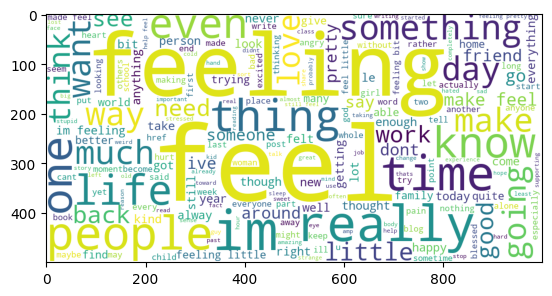

In [18]:
plt.imshow(wc)

In [ ]:
# Bag of Words Model (BOW)

In [19]:
cv = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the data
traindata = cv.fit_transform(var)

# Assign to X_train and y_train
X_train = traindata
y_train = df.Label

In [20]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 311217 stored elements and shape (18000, 117594)>

In [21]:
model = RandomForestClassifier()

In [22]:
# Hyper Parameter Tuning

parameters = {'max_features':('auto', 'sqrt'),
              'n_estimators': [500, 1000, 1500],
              'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5, 10],
              'min_samples_split': [5, 10, 15],
              'bootstrap': [True, False]}

In [23]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

In [24]:
grid_search = GridSearchCV(model,
                           parameters,
                           cv=5,
                           return_train_score = True,
                           n_jobs = 1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                             n_estimators=grid_search.best_params_['n_estimators'],
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             bootstrap=grid_search.best_params_['bootstrap'],
                             )

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
test_data = pd.read_csv("C:/Users/LOHITHA/Desktop/DSP/Datasets/emotions/test.txt", delimiter=';', names=['X_text', 'y_test'], header=None)

In [ ]:
# test_data = 
# X_test, y_test

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_score(y_test, y_pred)

In [ ]:
def sentimental_analysis(input):
  new_input = tranformation(input)
  transformed_input = cv.transform(new_input)
  prediction = rfc.predict(transformed_input)
  if prediction == 0:
    print('Negative Sentiment')
  elif prediction == 1:
    print('Positive Sentiment')
  else:
    print('Invalid Sentiment')

In [ ]:
input = "Today I was playing in the park and I fell"
inp = input("")

In [ ]:
sentimental_analysis(inp)